In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# Diabetes - From Sklearn Dataset

### Q: import diabetes data, and...
- read description to see what the target is, what features we have.
- is target categorical? or numerical?
- what does each target represent? eg: bp, s1, s2.. ??????

In [84]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

x_data = diabetes.data
y_data = diabetes.target
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [85]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Attribute Information:

    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

### Q convert sklearn data to pandas dataframe.
- add target column to the rightmost
- at the end, you must have N by 11 dataframe

In [86]:
df = pd.DataFrame(x_data, columns=diabetes.feature_names)
df["target"] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


### Q. Using pandas, check short summary of your dataframe then answer below
- any null value? if so, how can we replace this?
- how age can be 0.038076, -0.01882?
- how sex can be 0.050680 ?

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [88]:
df.describe().round(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,152.13
std,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,77.09
min,-0.11,-0.04,-0.09,-0.11,-0.13,-0.12,-0.10,-0.08,-0.13,-0.14,25.00
25%,-0.04,-0.04,-0.03,-0.04,-0.03,-0.03,-0.04,-0.04,-0.03,-0.03,87.00
50%,0.01,-0.04,-0.01,-0.01,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,140.50
75%,0.04,0.05,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.03,211.50
max,0.11,0.05,0.17,0.13,0.15,0.20,0.18,0.19,0.13,0.14,346.00


### Q how many male and female do we have?

In [89]:
df["sex"].value_counts()

sex
-0.044642    235
 0.050680    207
Name: count, dtype: int64

### Q. plot histogram of age, bmi, and bp
- using subplot of 1 row, 3 columns
- you can set bin-count on your decision
- is it follow normal distribution?

(array([ 35., 158., 136.,  90.,  23.]),
 array([-0.1123988 , -0.06351032, -0.01462183,  0.03426665,  0.08315513,
         0.13204362]),
 <BarContainer object of 5 artists>)

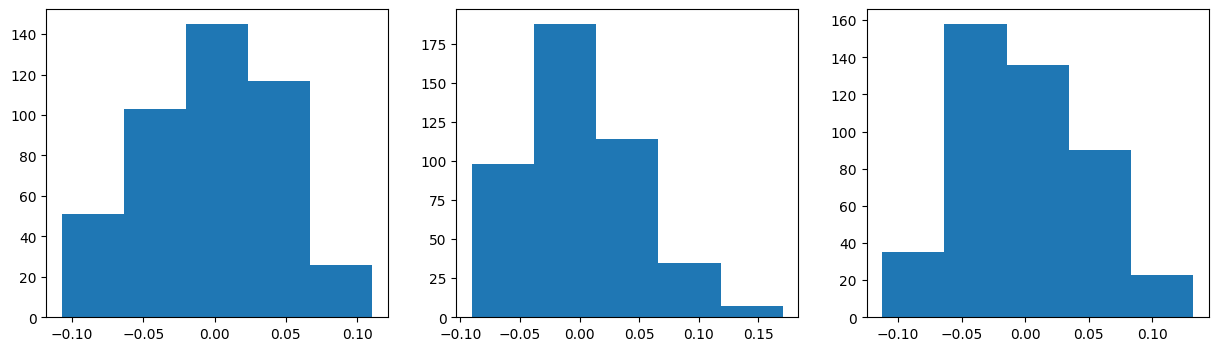

In [90]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.hist(df["age"], bins=5)
plt.subplot(1, 3, 2)
plt.hist(df["bmi"], bins=5)
plt.subplot(1, 3, 3)
plt.hist(df["bp"], bins=5)

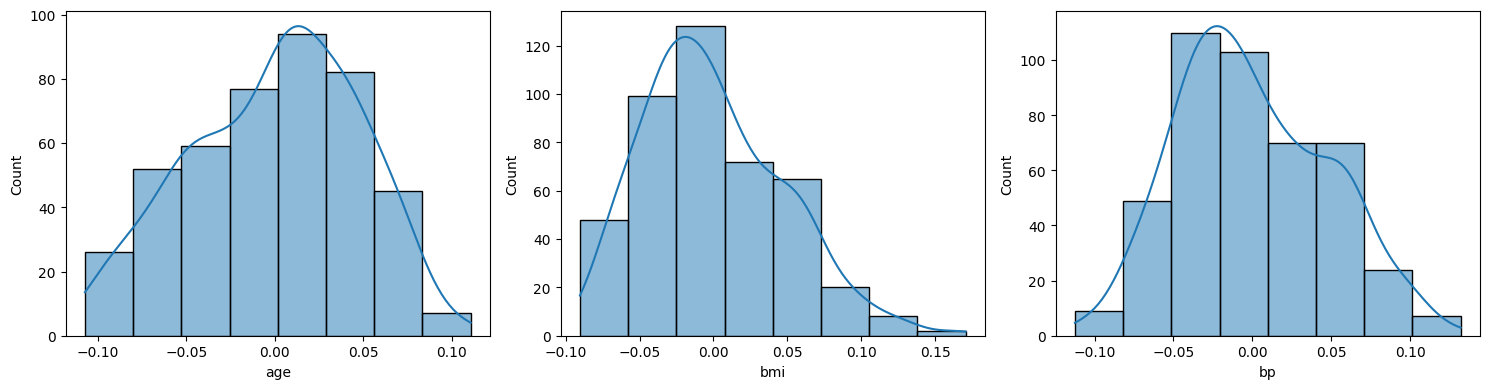

In [91]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.histplot(df["age"], bins=8, kde=True)
plt.subplot(1, 3, 2)
sns.histplot(df["bmi"], bins=8, kde=True)
plt.subplot(1, 3, 3)
sns.histplot(df["bp"], bins=8, kde=True)
plt.tight_layout()

#### FYI, you can plot histogram of all features at once
````python
df.hist(bins=20, figsize=(12, 6))
plt.tight_layout()
plt.show()

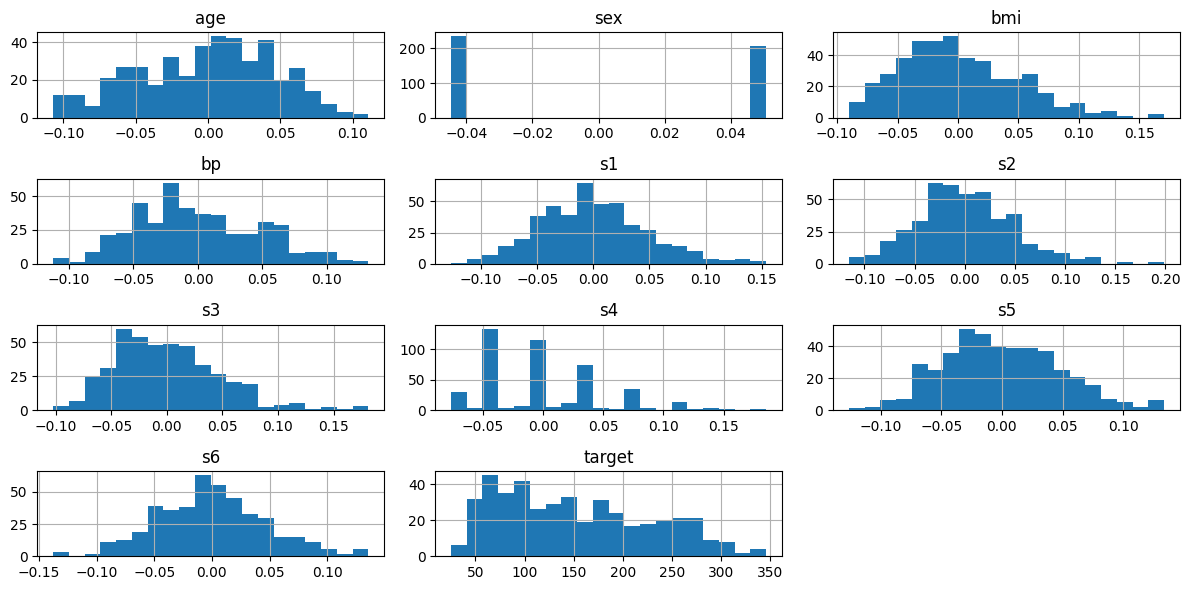

In [92]:
df.hist(bins=20, figsize=(12, 6))
plt.tight_layout()
plt.show()

### Q: Are there any outliers? Are the features well scaled?
- What kind of plot is the easiest way to check?
- Are the features scaled using Min-Max scaling or Standard scaling?

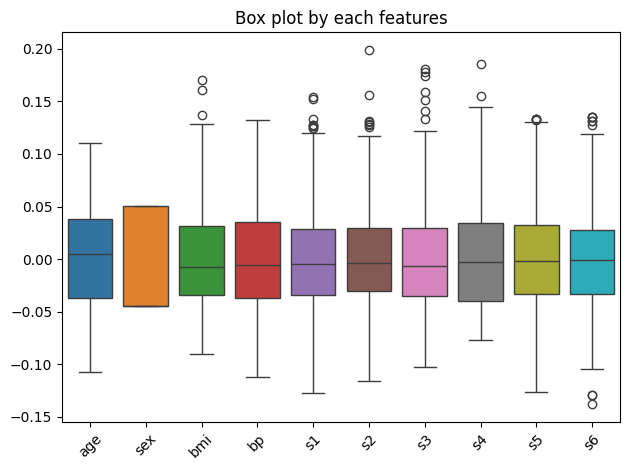

In [93]:
sns.boxplot(data=df.iloc[:, :-1], orient="v")
plt.title("Box plot by each features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

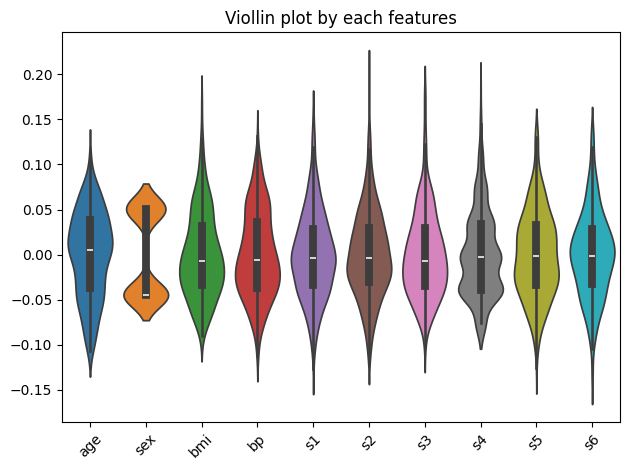

In [94]:
sns.violinplot(data=df.iloc[:, :-1], orient="v")
plt.title("Viollin plot by each features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Q pairplot age, sex, bmi, bp, taget to see relationship

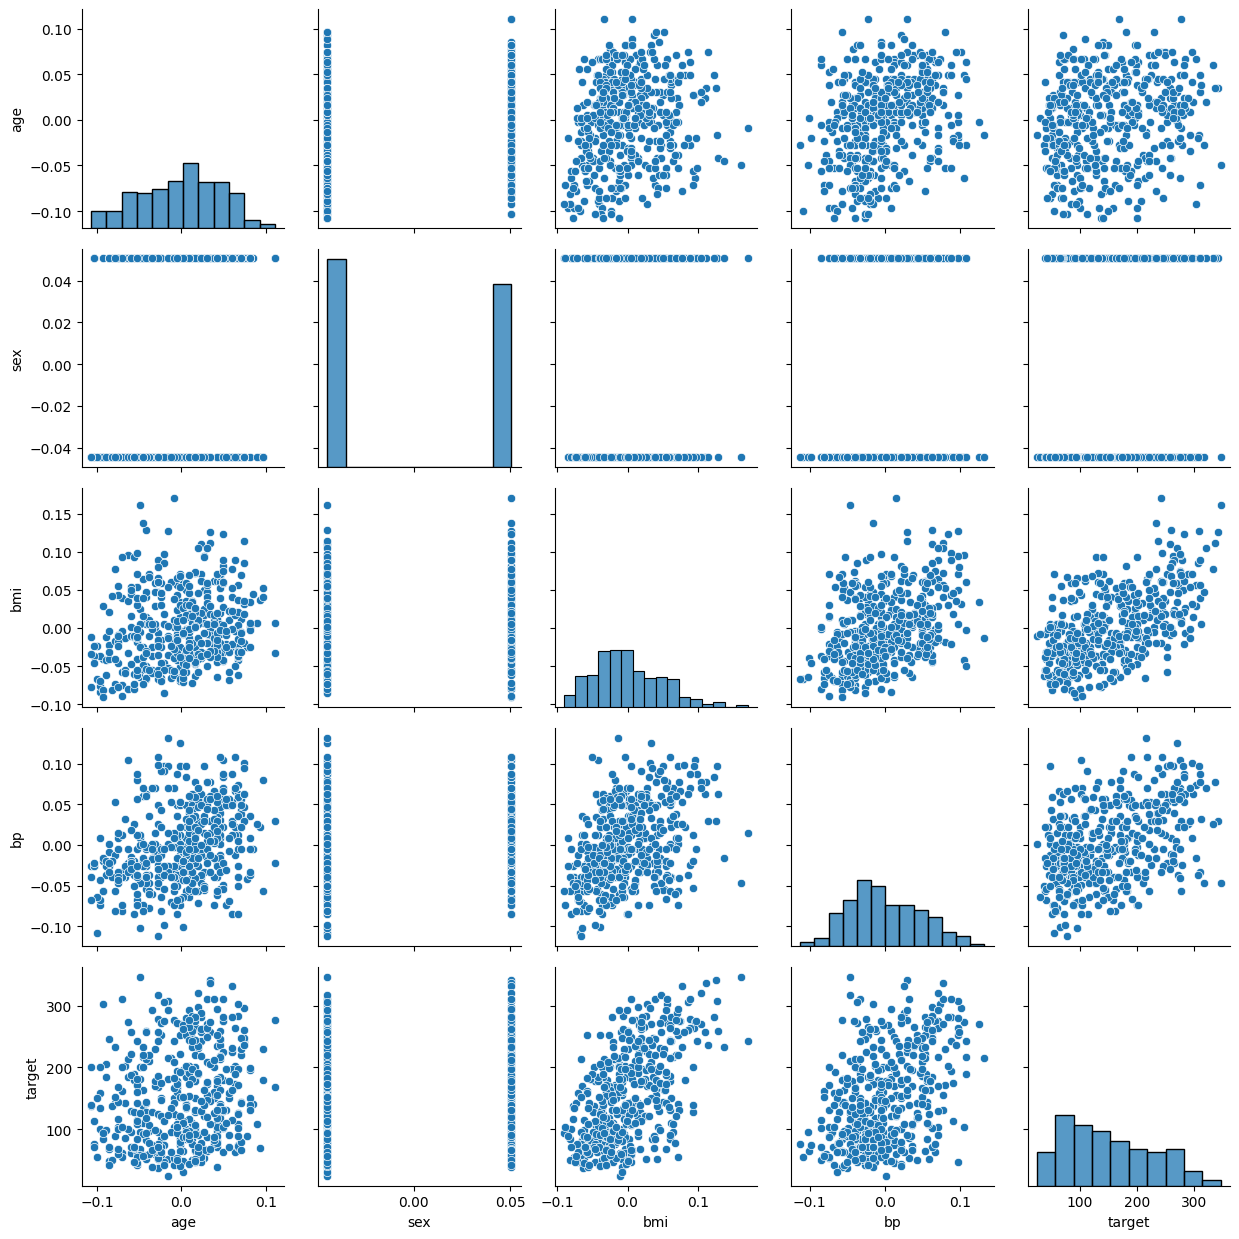

In [95]:
sns.pairplot(data=df.iloc[:, [0, 1, 2, 3, -1]])
plt.tight_layout()
plt.show()

### Plot scatter of subplots of 1-row 2-columns
- bmi vs target, 
- bp vs target

start with plt.figure(figsize=(12,5))

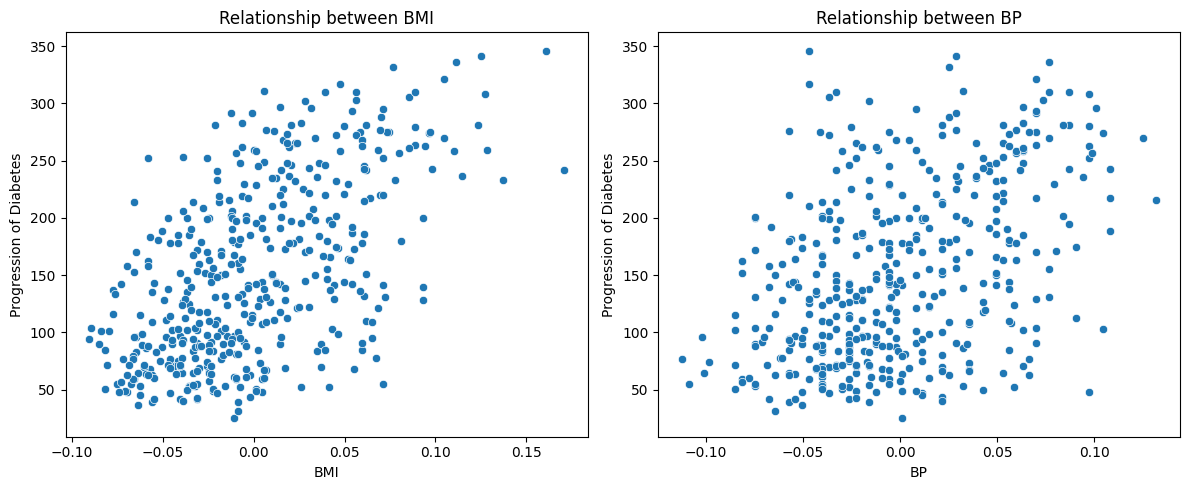

In [96]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x="bmi", y="target", data=df)
plt.xlabel("BMI")
plt.ylabel("Progression of Diabetes")
plt.title("Relationship between BMI")

plt.subplot(1, 2, 2)
sns.scatterplot(x="bp", y="target", data=df)
plt.xlabel("BP")
plt.ylabel("Progression of Diabetes")
plt.title("Relationship between BP")

plt.tight_layout()
plt.show()

### Q Do linear regression of each - Single/Simple linear regression

hint:
- print slope and interceet for each.
- you need to create two differant models for `bmi vs target` and `bp vs target`
- you do not need to re-import load-diabetes again. Use existing dataframe
- don't forget to `train-test-split`, because we need to calculate the score later

In [97]:
y = df["target"]
X1 = df["bmi"]
X2 = df["bp"]

In [98]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X1, X2, y)

In [99]:
from sklearn.linear_model import LinearRegression

# 단순선형회귀 모델 선택 및 훈련
model1 = LinearRegression()
model1.fit(X1_train.values.reshape(-1, 1), y_train)

# 모델 파라미터 출력
print("Result of BMI vs Target")
print("Slope(Beta):", model1.coef_[0])
print("Intercept:", model1.intercept_)

Result of BMI vs Target
Slope(Beta): 900.1706689044173
Intercept: 153.30317657024744


In [100]:
from sklearn.linear_model import LinearRegression

# 단순선형회귀 모델 선택 및 훈련
model2 = LinearRegression()
model2.fit(X2_train.values.reshape(-1, 1), y_train)

# 모델 파라미터 출력
print("Result of BP vs Target")
print("Slope(Beta):", model2.coef_[0])
print("Intercept:", model2.intercept_)

Result of BP vs Target
Slope(Beta): 701.4731839596457
Intercept: 153.59255453283893


### Q then plot trend-line for each
- set title to show equation: $y=ax+b$

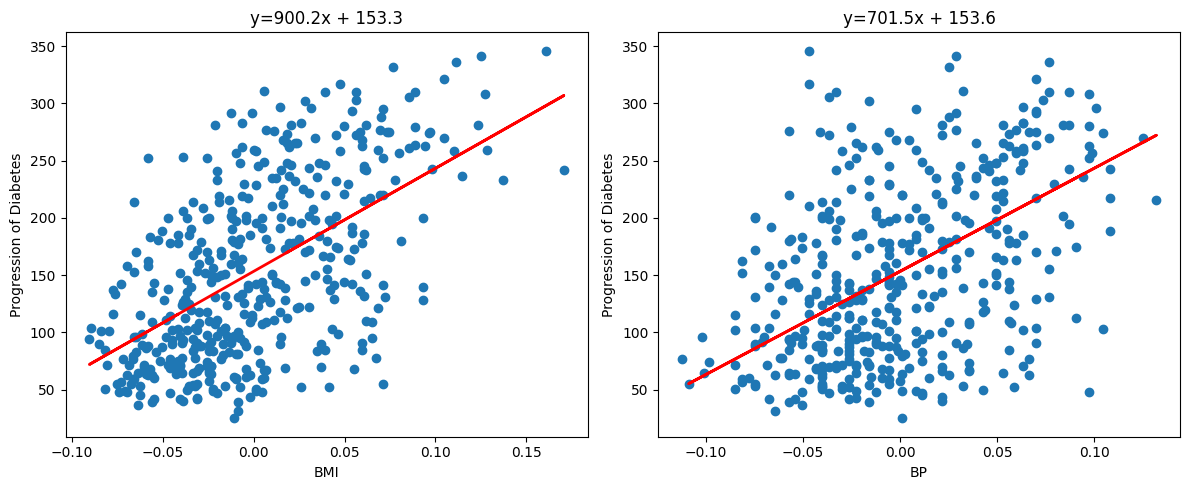

In [101]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(x="bmi", y="target", data=df)
plt.plot(
    X1_train, model1.predict(X1_train.values.reshape(-1, 1)), color="red", linewidth=2
)
plt.xlabel("BMI")
plt.ylabel("Progression of Diabetes")
plt.title(f"y={model1.coef_[0].round(1)}x + {model1.intercept_.round(1)}")

plt.subplot(1, 2, 2)
plt.scatter(x="bp", y="target", data=df)
plt.plot(
    X2_train, model1.predict(X2_train.values.reshape(-1, 1)), color="red", linewidth=2
)
plt.xlabel("BP")
plt.ylabel("Progression of Diabetes")
plt.title(f"y={model2.coef_[0].round(1)}x + {model2.intercept_.round(1)}")

plt.tight_layout()
plt.show()

#### FYI: you can draw regression plot using seaborn module easily

<Axes: xlabel='bp', ylabel='target'>

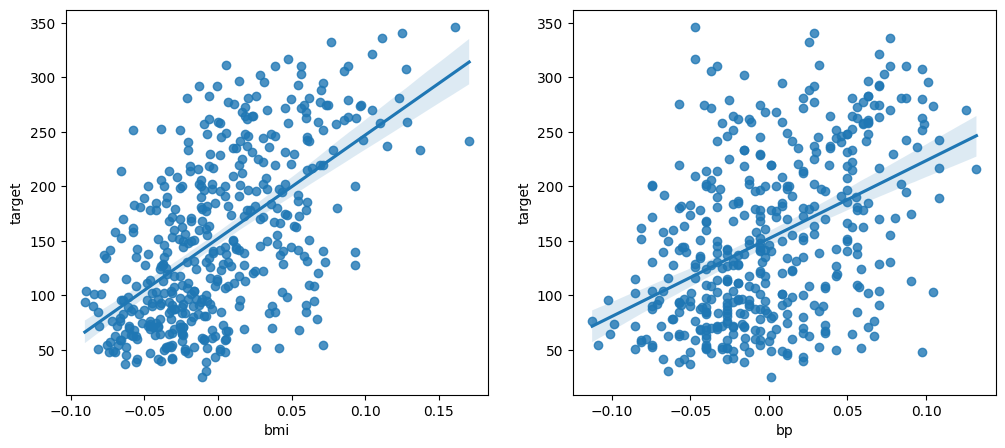

In [102]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.regplot(data=df, x="bmi", y='target')
plt.subplot(1, 2, 2)
sns.regplot(data=df, x="bp", y='target')

### Q Calculate the score
- model.score()
- mean square error
- r2_score

hint:
```python
from sklearn.metrics import mean_squared_error, r2_score

In [103]:
print(model1.score(X1_test.values.reshape(-1, 1), y_test))
print(model2.score(X2_test.values.reshape(-1, 1), y_test))

0.38945224086418095
0.16796291466064994


In [104]:
from sklearn.metrics import mean_squared_error, r2_score


mse_bmi = mean_squared_error(y_test, model1.predict(X1_test.values.reshape(-1, 1)))
print("MSE of bmi= ", mse_bmi)
mse_bp = mean_squared_error(y_test, model1.predict(X2_test.values.reshape(-1, 1)))
print("MSE of bp= ", mse_bp)


r2_bmi = r2_score(y_test, model1.predict(X1_test.values.reshape(-1, 1)))
print("R2 of bmi= ", r2_bmi)
r2_bp = r2_score(y_test, model1.predict(X2_test.values.reshape(-1, 1)))
print("R2 of bp= ", r2_bp)

MSE of bmi=  4152.911467564344
MSE of bp=  5688.872634094204
R2 of bmi=  0.38945224086418095
R2 of bp=  0.16364014357561407


## We can improve the score! Let's do multi-regression

### redefine target and feature

In [105]:
y = df["target"]
X = df.iloc[:, :-1]

### on your own

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)


In [107]:
from sklearn.linear_model import LinearRegression

# 단순선형회귀 모델 선택 및 훈련
model3 = LinearRegression()
model3.fit(X_train, y_train)

# 모델 파라미터 출력
print("Result of All vs Target")
print("Slope(Beta):", model3.coef_[:])
print("Intercept:", model3.intercept_)

Result of All vs Target
Slope(Beta): [  18.71718334 -217.90421066  526.38294436  278.35746446 -858.8759327
  386.98340525  226.66430017  401.43001422  714.2695216   114.51365802]
Intercept: 152.31263633255287


In [108]:
print(r2_score(y_test, model3.predict(X_test)))
print(model3.score(X_test, y_test))

y_pred = model3.predict(X_test)
print(mean_squared_error(y_test, y_pred))

0.4165671438500069
0.4165671438500069
3158.9732154717444


### Q. what does increased-R-Square-score tell us?
- will multi-regression R2 always result higher?

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Diabetes - From Kaggle

[data source](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

In [109]:
df2 = pd.read_csv("./data/diabetes.csv")
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [110]:
df2["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### Q. any null values?
- if so, how can we handle this?

In [111]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [112]:
df2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [113]:
mask = df2.iloc[:,:-1] == 0
df2[mask].count()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [114]:
df2[mask] = np.nan
df2.dropna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1.0,189.0,60.0,23.0,846.0,30.1,0.398,59,1
14,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
751,1.0,121.0,78.0,39.0,74.0,39.0,0.261,28,0
755,1.0,128.0,88.0,39.0,110.0,36.5,1.057,37,1
760,2.0,88.0,58.0,26.0,16.0,28.4,0.766,22,0
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
